In [1]:
import numpy as np
import pylab as plt
import pandas as pd
import seaborn as sns

In [2]:
import sys
sys.path.append('../../data')
from corpus import load_corpus
data = load_corpus('newsela')

text_features_df = data['text_features_df']
features_mask = data['features_mask']
features_y_mask = data['features_y_mask']
X_all = data['X_all']
y_all = data['y_all']
feature_names = data['feature_names']

Using TensorFlow backend.


## Features Statistics

In [3]:
text_features_df.loc[:, features_mask].describe().transpose()

count       mean        std       min  \
feature_adj                         21668.0   0.089168   0.017858  0.000000   
feature_adverbs                     21668.0   0.728950   0.257114  0.000000   
feature_avgnpsize                   21668.0   3.062202   0.636261  1.500000   
feature_avgparsetreeheight          21668.0   6.334264   1.246580  3.000000   
feature_avgppsize                   21668.0   4.700835   0.970868  0.000000   
feature_avgvpsize                   21668.0   8.004836   1.899736  2.000000   
feature_conj                        21668.0   0.115747   0.018401  0.000000   
feature_interj                      21668.0   0.004927   0.013397  0.000000   
feature_modals                      21668.0   0.173636   0.109293  0.000000   
feature_nouns                       21668.0   0.315038   0.030523  0.165289   
feature_num_comma                   21668.0   0.614801   0.342998  0.000000   
feature_numconstituents             21668.0  13.029002   3.735569  5.000000   
feature_numdet                      21668.0   1.322693   0.484294  0.264151   
feature_numfuncwords                21668.0   4.460645   1.457932  1.000000   
feature_numnp                       21668.0   5.142592   1.623844  1.000000   
feature_numpp                       21668.0   1.412348   0.599511  0.000000   
feature_numprep                     21668.0  77.197157  34.914283  0.000000   
feature_numsbar                     21668.0   0.501923   0.236191  0.000000   
feature_numsbarq                    21668.0   0.005898   0.014027  0.000000   
feature_numvb                       21668.0   0.507613   0.210187  0.000000   
feature_numvbd                      21668.0   0.583324   0.313802  0.000000   
feature_numvbg                      21668.0   0.265165   0.148518  0.000000   
feature_numvbn                      21668.0   0.324665   0.181533  0.000000   
feature_numvbp                      21668.0   0.323961   0.161162  0.000000   
feature_numvp                       21668.0   2.948402   0.753765  1.271429   
feature_numwh                       21668.0   0.204046   0.121260  0.000000   
feature_perpro                      21668.0   0.547417   0.209276  0.000000   
feature_pronouns                    21668.0   0.057094   0.023330  0.000000   
feature_propernouns                 21668.0   0.093508   0.034224  0.000000   
feature_rs_chars/words              21668.0   4.613905   0.249355  3.695749   
feature_rs_long/words               21668.0   0.208694   0.046320  0.038123   
feature_rs_monosyllable/words       21668.0   0.714516   0.047801  0.557851   
feature_rs_polysyllable/words       21668.0   0.091981   0.032719  0.000000   
feature_rs_sents/words              21668.0   0.083447   0.024847  0.028926   
feature_rs_sqrt_polysyllable/sents  21668.0   1.084849   0.322644  0.000000   
feature_rs_syllables/words          21668.0   1.403761   0.090794  1.104478   
feature_senlen                      21668.0  15.596510   4.637780  6.875000   
feature_ver                         21668.0   0.188906   0.024250  0.095238   
feature_whpro                       21668.0   0.063045   0.053570  0.000000   

                                          25%        50%        75%  \
feature_adj                          0.077287   0.088504   0.100494   
feature_adverbs                      0.550000   0.691358   0.864407   
feature_avgnpsize                    2.565217   3.031881   3.494048   
feature_avgparsetreeheight           5.426230   6.191489   7.062698   
feature_avgppsize                    3.968750   4.628205   5.326968   
feature_avgvpsize                    6.569111   7.891862   9.246345   
feature_conj                         0.104512   0.117085   0.128108   
feature_interj                       0.000000   0.000000   0.000000   
feature_modals                       0.095238   0.151515   0.228978   
feature_nouns                        0.294574   0.315699   0.335436   
feature_num_comma                    0.340788   0.573529   0.829268   
feature_numconstituents  

## Features Correlations

In [4]:
fs_corr_df = text_features_df.loc[:, features_mask].corr()

In [5]:
fs_single_corrs = (fs_corr_df.unstack()
                     .sort_values(ascending=False)
                         [len(fs_corr_df):][::2])

In [6]:
fs_single_corrs.head(10)

feature_numconstituents        feature_senlen                0.986380
feature_senlen                 feature_numnp                 0.981028
feature_numnp                  feature_numconstituents       0.972696
feature_senlen                 feature_numfuncwords          0.972633
feature_numfuncwords           feature_numconstituents       0.971735
feature_numnp                  feature_numpp                 0.955696
feature_numfuncwords           feature_numnp                 0.955040
feature_numconstituents        feature_avgparsetreeheight    0.942163
feature_senlen                 feature_numpp                 0.941408
feature_rs_polysyllable/words  feature_rs_syllables/words    0.938280
dtype: float64

In [7]:
fs_single_corrs.tail(10)

feature_rs_sents/words         feature_avgvpsize               -0.871152
feature_rs_long/words          feature_rs_monosyllable/words   -0.875634
feature_rs_sents/words         feature_numpp                   -0.882882
feature_rs_chars/words         feature_rs_monosyllable/words   -0.883151
feature_avgparsetreeheight     feature_rs_sents/words          -0.885529
feature_rs_sents/words         feature_numfuncwords            -0.912127
feature_numnp                  feature_rs_sents/words          -0.915370
feature_rs_sents/words         feature_numconstituents         -0.922979
                               feature_senlen                  -0.929501
feature_rs_monosyllable/words  feature_rs_syllables/words      -0.948560
dtype: float64

In [8]:
fs_single_corrs[(fs_single_corrs < 0.01) & (fs_single_corrs > -0.01)]

feature_numsbarq                    feature_numvbg                   0.008121
feature_propernouns                 feature_senlen                   0.007913
feature_numsbarq                    feature_numvp                    0.006565
feature_propernouns                 feature_rs_sents/words           0.005676
feature_pronouns                    feature_numvbd                   0.005034
feature_nouns                       feature_whpro                    0.004864
feature_interj                      feature_adj                      0.003554
feature_avgnpsize                   feature_numsbarq                 0.002300
feature_numsbarq                    feature_numdet                   0.002179
feature_nouns                       feature_numvp                    0.001758
feature_interj                      feature_modals                  -0.000465
feature_rs_sqrt_polysyllable/sents  feature_numsbarq                -0.001473
                                    feature_interj              

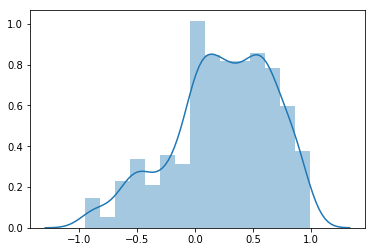

In [9]:
sns.distplot(fs_single_corrs)

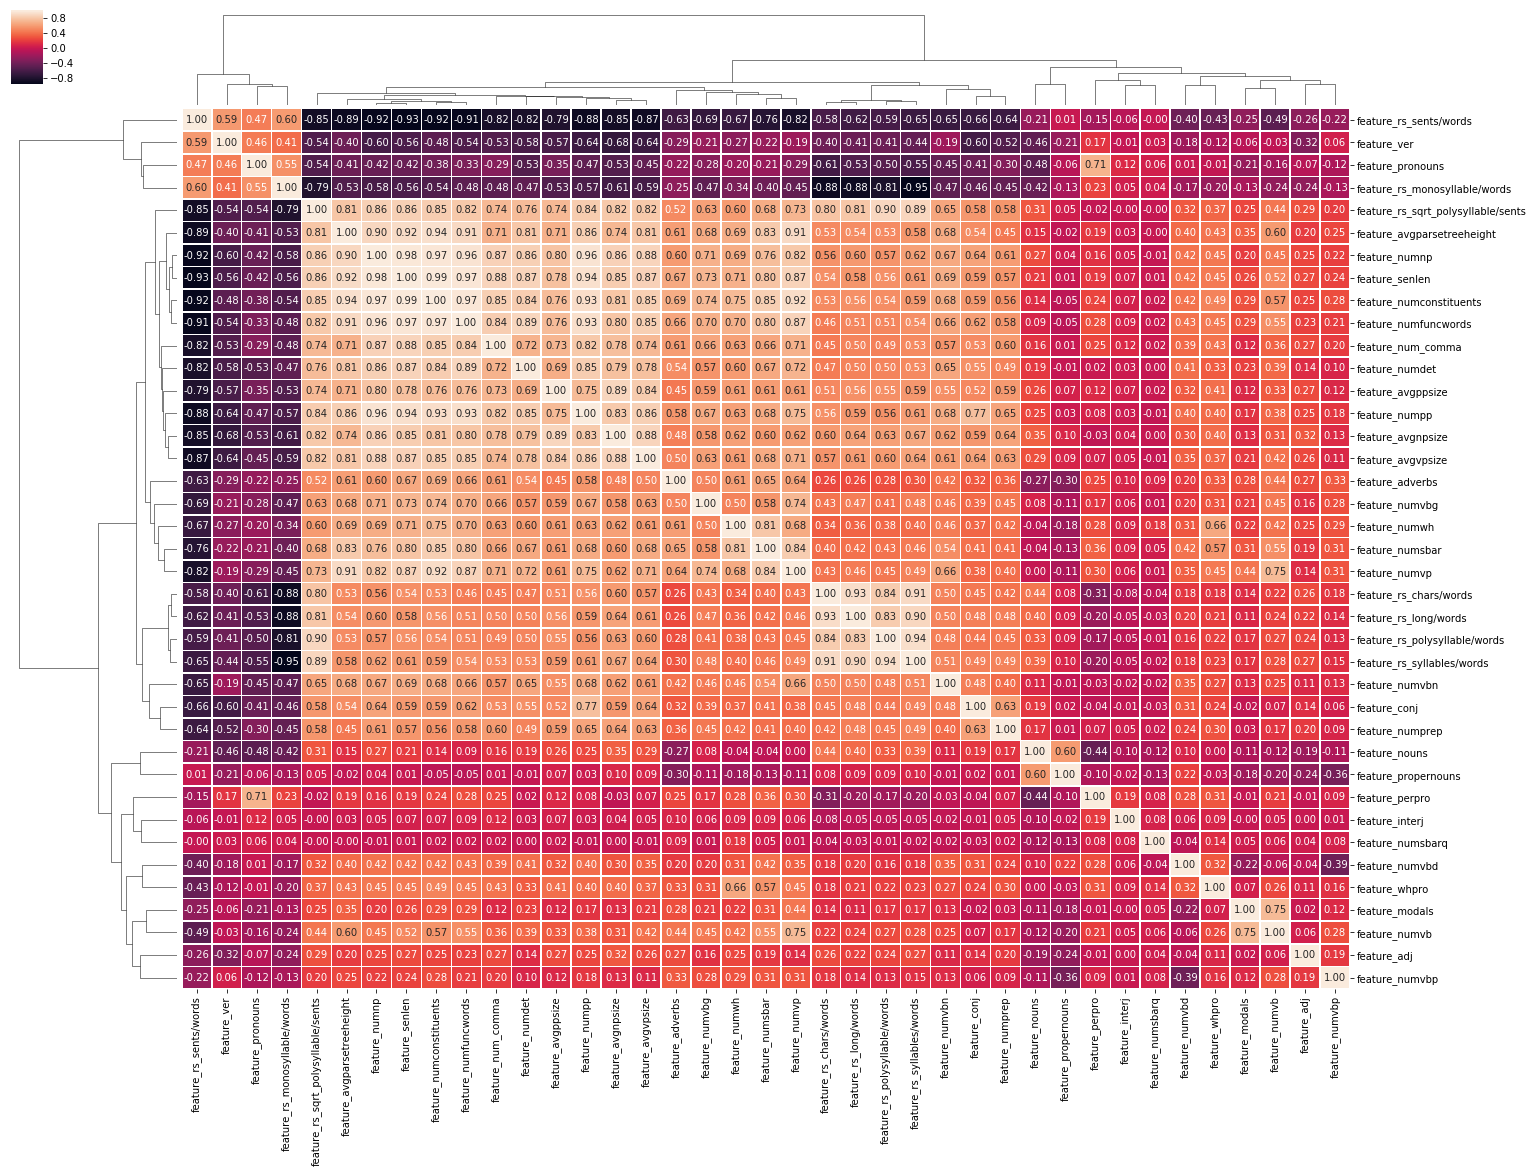

In [10]:
features_clustering = sns.clustermap(fs_corr_df, annot=True, fmt='0.2f', linewidths=.5, figsize=(24, 18))

In [11]:
ordered_features_columns = np.take(text_features_df.columns[features_mask],
                    [i for i in features_clustering.dendrogram_col.reordered_ind])
#sns.pairplot(text_features_df[ordered_features_columns])

## Features Distribution by Label

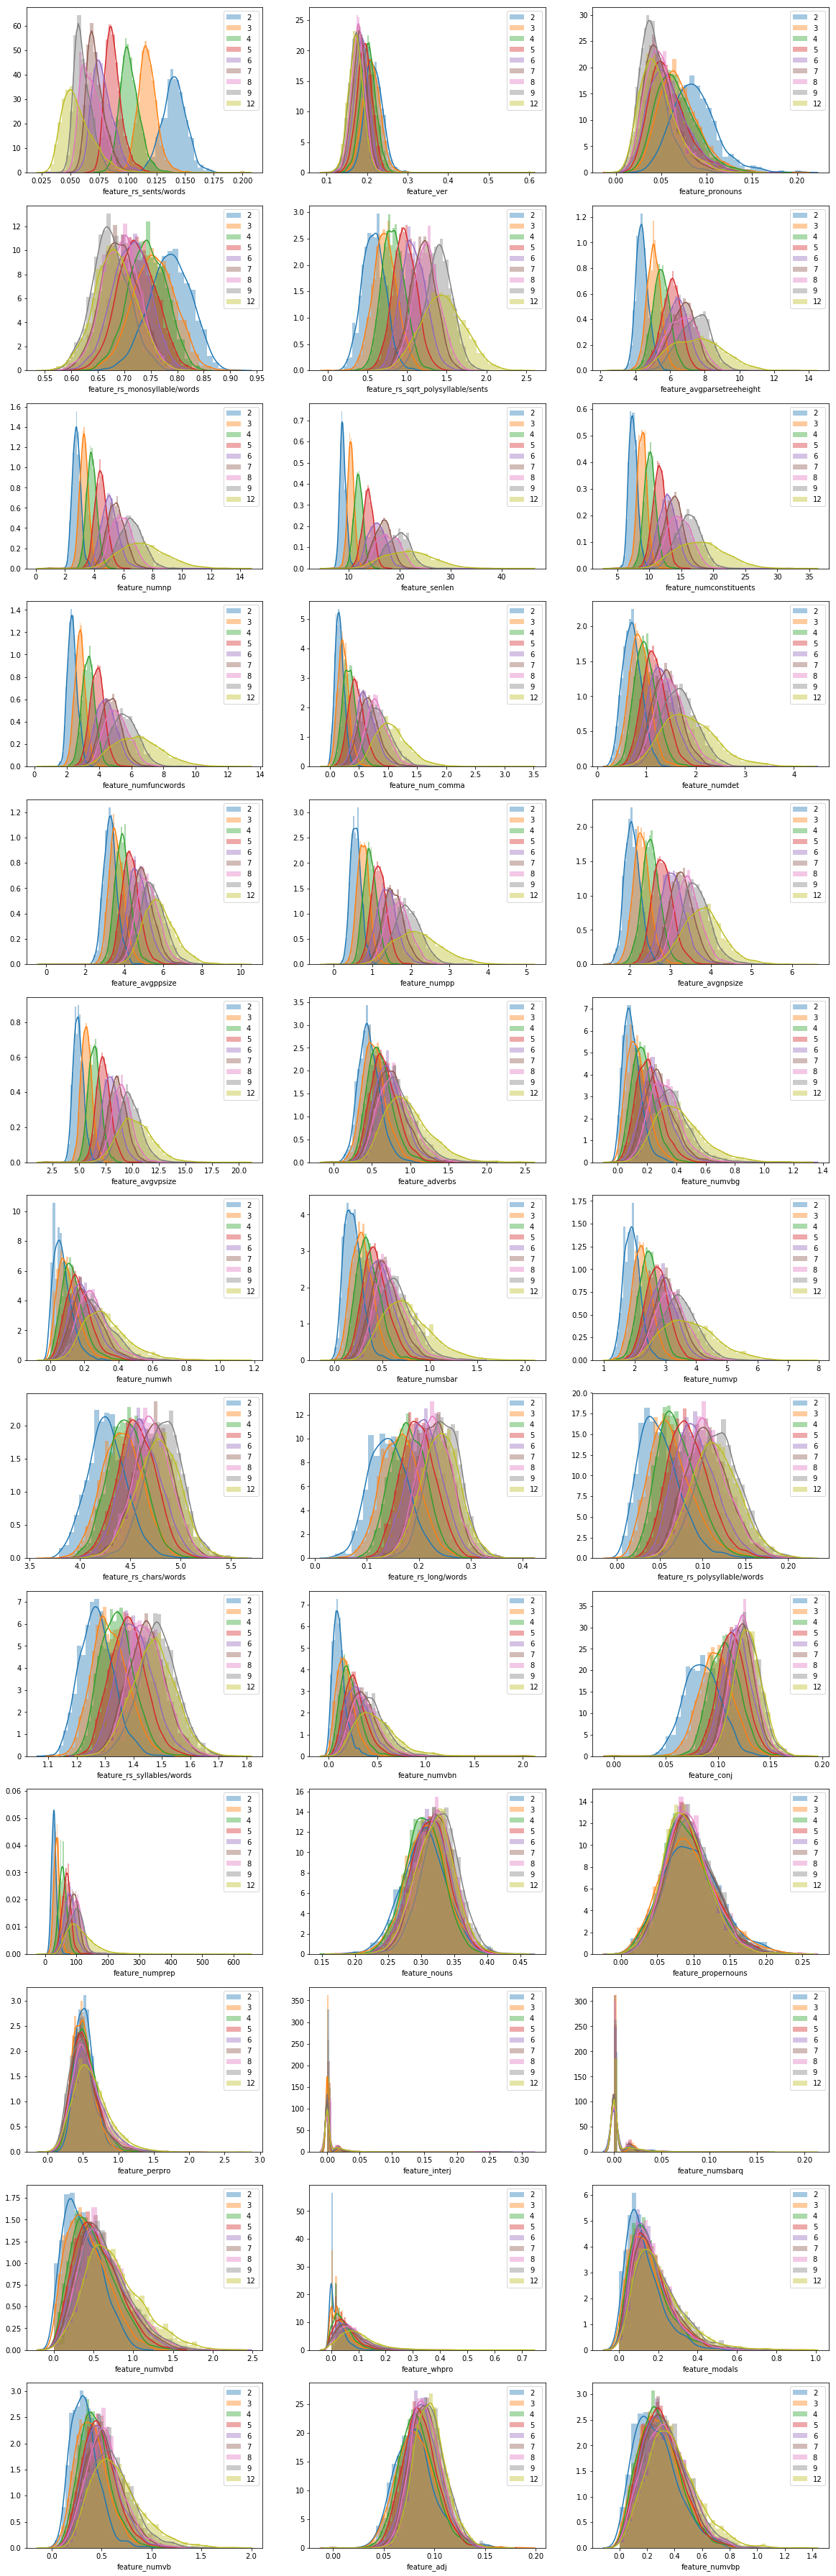

In [12]:
import itertools as it

n_rows = len(feature_names)//3 + int(len(feature_names) % 3 != 0)

f, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))
axes = it.chain(*axes)

for feature_name, ax in zip(ordered_features_columns, axes):
    for y_value in np.sort(text_features_df['y'].unique()): 
        sns.distplot(text_features_df[text_features_df['y']==y_value][feature_name],
                     label=str(y_value), ax=ax)
    ax.legend()
    
for ax in axes:
    ax.set_visible(False)

## Feature Importance

### ANOVA F-value to Features

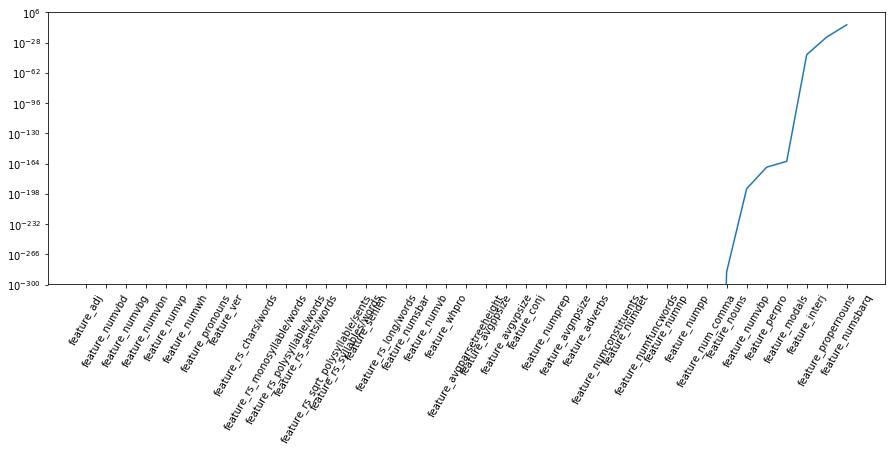

In [13]:
from sklearn.feature_selection import f_classif

_, p_values = f_classif(X_all, y_all)

features_f_classif_order = np.argsort(p_values)
p_values.sort()

f, ax = plt.subplots(figsize=(15, 5))
ax.plot(p_values)
plt.xticks(range(len(p_values)),
           (text_features_df.columns[features_mask][features_f_classif_order]),
          rotation=60)
ax.set_yscale("log")

### Extra Trees

Feature ranking:
1. feature_rs_sents/words (0.072819)
2. feature_senlen (0.063778)
3. feature_numnp (0.051511)
4. feature_numconstituents (0.046974)
5. feature_num_comma (0.045719)
6. feature_avgvpsize (0.044969)
7. feature_numprep (0.042757)
8. feature_avgparsetreeheight (0.041225)
9. feature_avgnpsize (0.041086)
10. feature_numfuncwords (0.039914)
11. feature_numpp (0.033091)
12. feature_rs_sqrt_polysyllable/sents (0.028175)
13. feature_avgppsize (0.027761)
14. feature_numsbar (0.022192)
15. feature_numvp (0.021490)
16. feature_numvbg (0.020374)
17. feature_numdet (0.019737)
18. feature_rs_long/words (0.018728)
19. feature_rs_syllables/words (0.018645)
20. feature_rs_chars/words (0.018371)
21. feature_rs_monosyllable/words (0.017952)
22. feature_rs_polysyllable/words (0.017337)
23. feature_numwh (0.016774)
24. feature_numvbn (0.016704)
25. feature_adverbs (0.016354)
26. feature_ver (0.016112)
27. feature_conj (0.016048)
28. feature_pronouns (0.015923)
29. feature_perpro (0.015278)
30

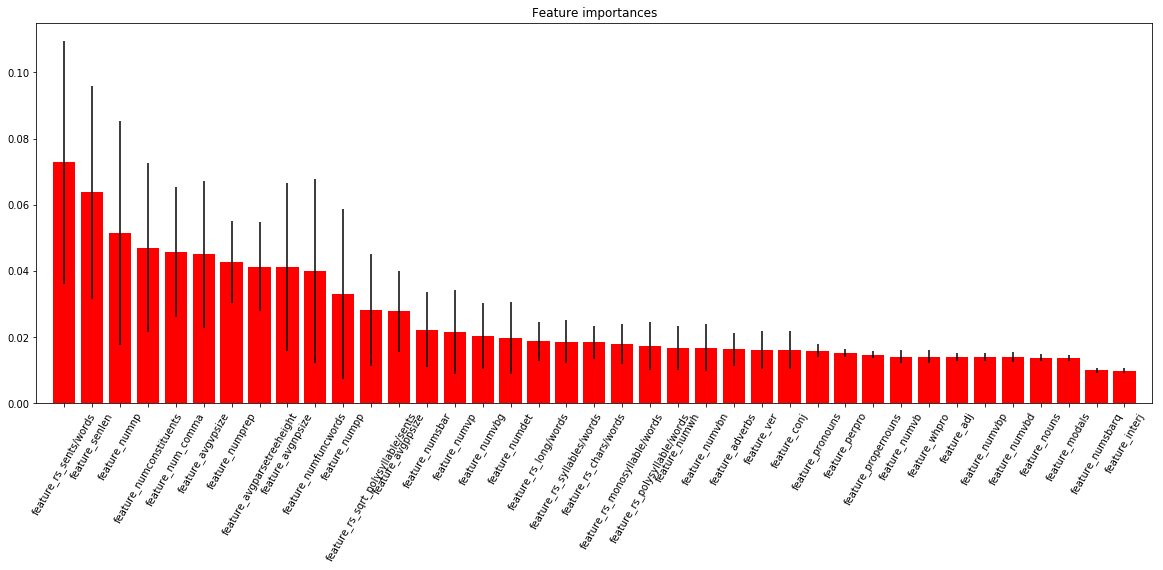

In [14]:
from sklearn.ensemble import ExtraTreesClassifier

forest_model = ExtraTreesClassifier(n_estimators=250,
                              random_state=42)
forest_model.fit(X_all, y_all)

importances = forest_model.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

ordered_feature_names = np.take(feature_names, indices
                               )
for f in range(X_all.shape[1]):
    print("%d. %s (%f)" % (f + 1, ordered_feature_names[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20, 7))
plt.title("Feature importances")
plt.bar(range(X_all.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_all.shape[1]), ordered_feature_names, rotation=60)
plt.xlim([-1, X_all.shape[1]])
plt.show()

## Embedding Visualization

In [15]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from umap import UMAP

def plot_embedding(embedder, X, y, title=''):
    embedding = embedder.fit_transform(X_all)
    f, ax = plt.subplots(figsize=(15, 15))
    for y_value in np.sort(y_all.unique()):
        mask = (y == y_value)
        
        ax.scatter(embedding[mask, 0], embedding[mask, 1],
                c=sns.color_palette(n_colors=13)[y_value], label=y_value, s=8)

    f.gca().set_aspect('equal', 'datalim')
    plt.legend()
    plt.title(embedder.__class__.__name__ + title)

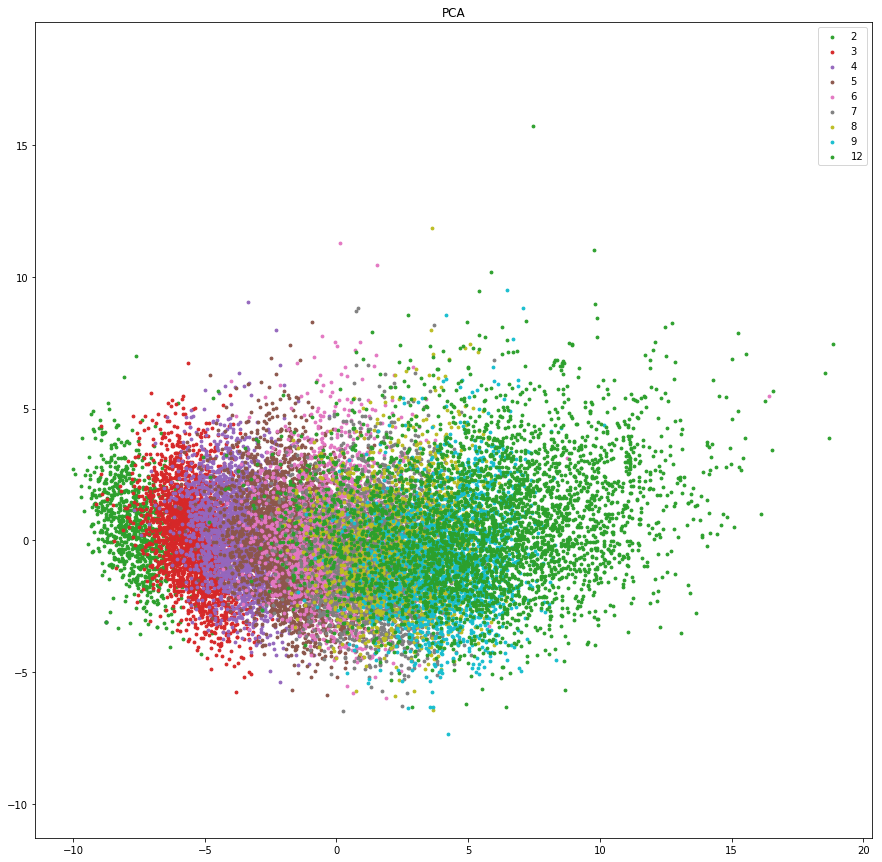

In [16]:
plot_embedding(PCA(), X_all, y_all)

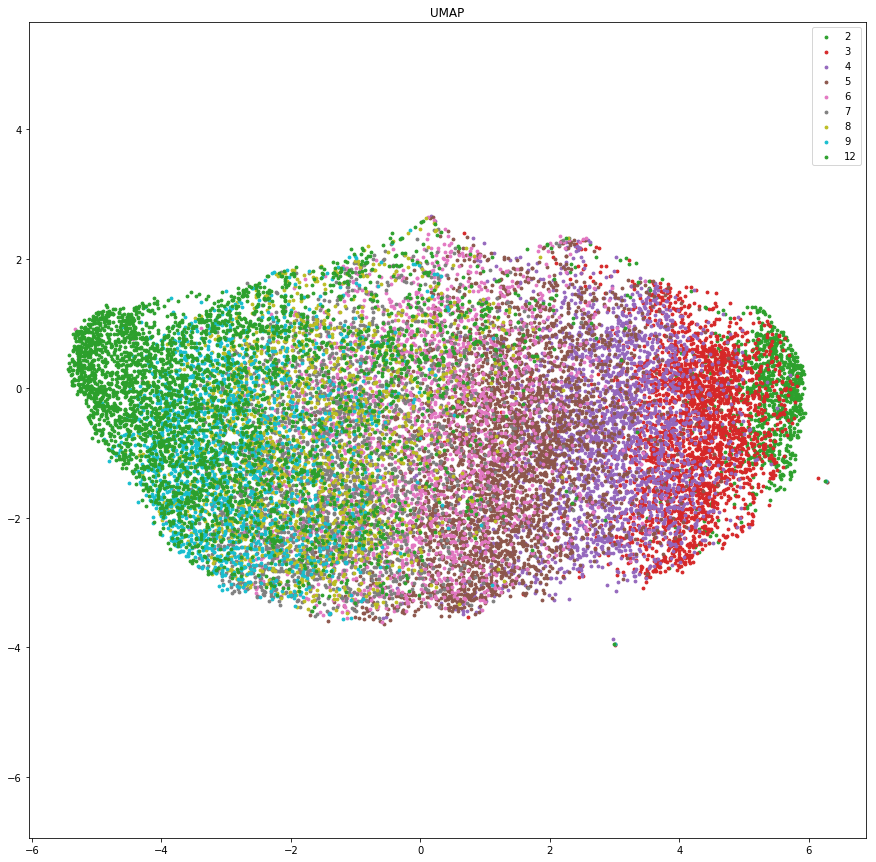

In [17]:
plot_embedding(UMAP(random_state=42), X_all, y_all)

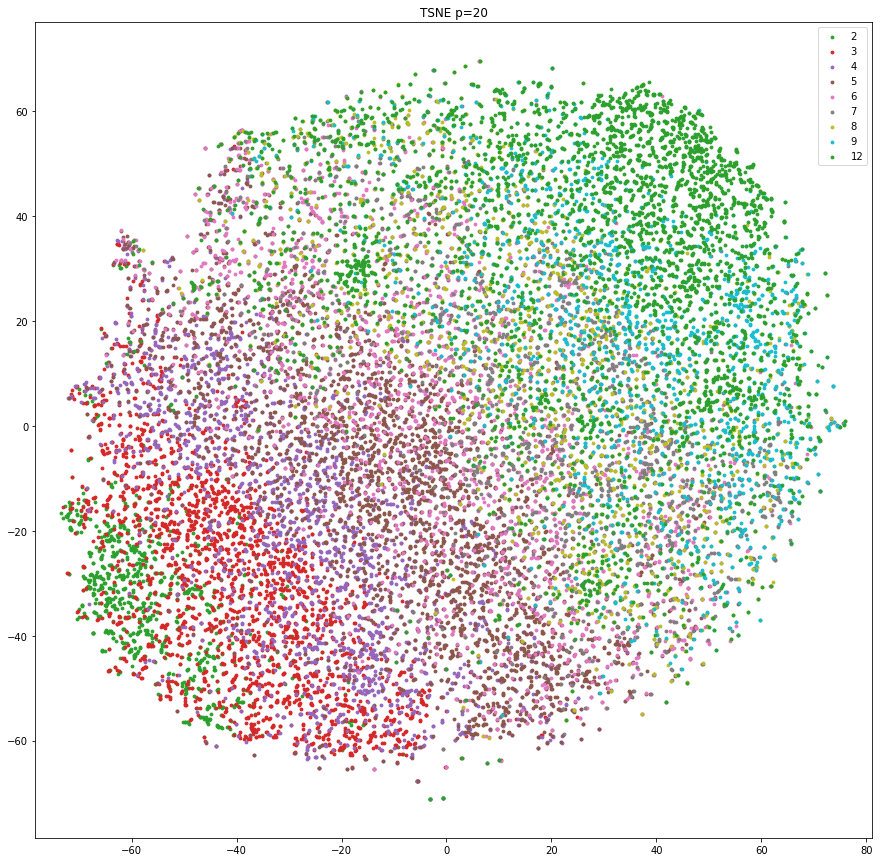

In [18]:
plot_embedding(TSNE(perplexity=20, random_state=42), X_all, y_all, title=' p=20')

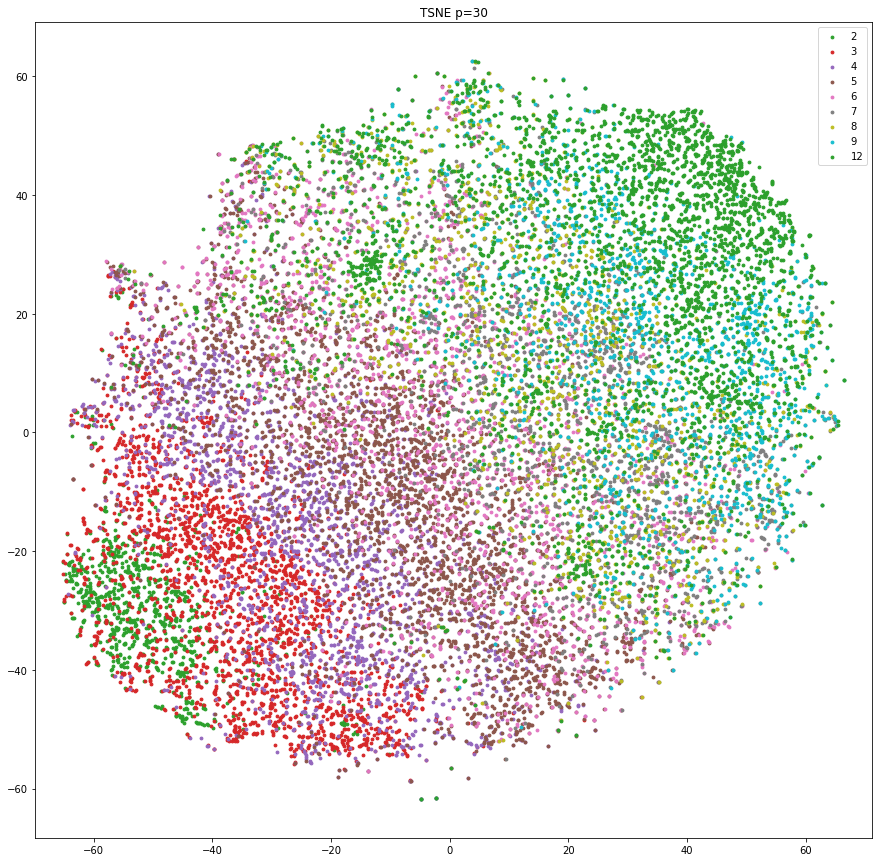

In [19]:
plot_embedding(TSNE(perplexity=30, random_state=42), X_all, y_all, title=' p=30')

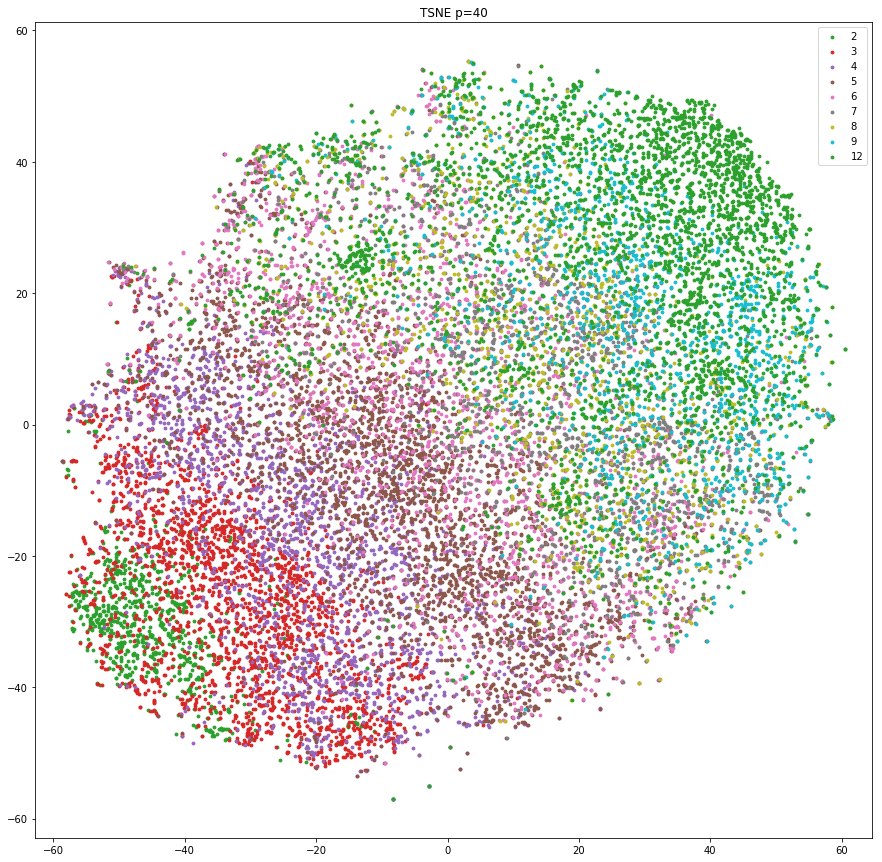

In [20]:
plot_embedding(TSNE(perplexity=40, random_state=42), X_all, y_all, title=' p=40')